In [1]:
import importlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import rcParams
plt.rcParams['xtick.labelsize']  = 18
plt.rcParams['ytick.labelsize']  = 18
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family']      = 'STIXGeneral'
plt.rcParams['axes.labelsize']   = 20
plt.rcParams['axes.titlesize']   = 20
plt.rcParams['font.size']        = 10
plt.rcParams['legend.fontsize']  = 20
plt.rcParams.update({'figure.autolayout': True})

from tqdm import tqdm
import random
import os
import time
import h5py
from datetime import datetime


import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Conv2DTranspose

# Import auxiliary libraries

import auxLib; importlib.reload(auxLib)

Importing library...
Library successfully imported
Importing library...
Library successfully imported


<module 'auxLib' from 'd:\\Facultad\\Doctorado\\Proyectos\\paper\\auxLib.py'>

# Main variables

In [3]:
L = 40

densities = [0.55, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.7, 0.8, 0.9, 1.0]

densities_str = ['055','06', '061', '062', '063', '064', '065', '07', '08', '09','1']

neurons = 200

seed = 15

In [4]:
# Simulated images

loader_init = auxLib.loader_and_saver(os.getcwd())


# Training model of 08-20-24

In [5]:
training = ['para', 'ferro']

modelsfolder, resultsfolder = auxLib.folders(directory='2024-08-20', training=training, percolation=True)

saving_folder = os.path.join(os.getcwd(), 'DNN', 'Para_Ferro', 'percolation', 'prueba', datetime.now().strftime('%Y-%m-%d'))
os.makedirs(saving_folder, exist_ok = True)

In [6]:
neurons = 200

model_path = os.path.join(modelsfolder, f'dnn_n{neurons}_DO02.h5')

dnn = keras.models.load_model(model_path)

In [8]:
def predictor(L, model, sim_images, name, 
            training=['para', 'ferro', 'neel', 'stripe'],
                        directory=None, reshape = True, 
                        verbose=False, save_prediction=False):
    '''
    reshape: only if we need to flatten the array, otherwise, it is not needed.

    verbose: if we want to see the progress of the prediction.
    '''
    name_folder = auxLib.name_of_folder(training)

    if reshape:
        sim_images = [array.reshape((251, L*L)) for array in sim_images]
        
    prediction = np.zeros((251, len(sim_images)))

    for i in tqdm(range(len(sim_images)), 
                            desc="Predicting", unit="repetitions"):
        predict = model.predict(sim_images[i], verbose=verbose)
        prediction[:, i] = predict[:,1]

    if directory is None:
        directory = os.path.join(os.getcwd(), 'DNN', name_folder, 
                                'predictions', datetime.now().strftime('%Y-%m-%d'))

    if not os.path.exists(directory):
        os.makedirs(directory)
    
    if save_prediction:
        temperature = np.arange(0.0, 5.02, 0.02).reshape(251,1)#.tolist()
        columns = ['Temperature'] + [str(i) for i in list(range(1, len(sim_images)+1))]
        combined_array = np.concatenate((temperature, prediction), axis=1) #np.hstack((temperature, prediction))
        prediction_df = pd.DataFrame(combined_array, columns=columns)
        prediction_df.to_csv(os.path.join(os.getcwd(), directory, f'predictions_{name}.csv'), index=False)
    
    return prediction

In [9]:
for densitiy_index, density in enumerate(densities):
    
    sim_images, temperature = loader_init.simulatedImages(densitiy_index)

    prediction = predictor(L, dnn, sim_images,  # We are not using auxLib.predictor here
                                name=f'{densities_str[densitiy_index]}', 
								training=training,
                                directory=resultsfolder, 
                                reshape = True, 
                                verbose=False, 
                                save_prediction=True)

Loading simulated images...


Loading arrays: 100%|██████████| 196/196 [00:04<00:00, 46.89array/s]


Files loaded!
Data of density p = 0.55 succesfully loaded.


Predicting: 100%|██████████| 196/196 [00:26<00:00,  7.48repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 150/150 [00:01<00:00, 75.90array/s]


Files loaded!
Data of density p = 0.6 succesfully loaded.


Predicting: 100%|██████████| 150/150 [00:15<00:00,  9.63repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 199/199 [00:04<00:00, 48.95array/s]


Files loaded!
Data of density p = 0.61 succesfully loaded.


Predicting: 100%|██████████| 199/199 [00:22<00:00,  8.68repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 187/187 [00:02<00:00, 63.24array/s]


Files loaded!
Data of density p = 0.62 succesfully loaded.


Predicting: 100%|██████████| 187/187 [00:20<00:00,  9.04repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 163/163 [00:02<00:00, 59.12array/s]


Files loaded!
Data of density p = 0.63 succesfully loaded.


Predicting: 100%|██████████| 163/163 [00:14<00:00, 11.07repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 142/142 [00:01<00:00, 72.17array/s]


Files loaded!
Data of density p = 0.64 succesfully loaded.


Predicting: 100%|██████████| 142/142 [00:11<00:00, 12.00repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 161/161 [00:01<00:00, 83.98array/s]


Files loaded!
Data of density p = 0.65 succesfully loaded.


Predicting: 100%|██████████| 161/161 [00:12<00:00, 12.89repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 151/151 [00:01<00:00, 90.60array/s]


Files loaded!
Data of density p = 0.7 succesfully loaded.


Predicting: 100%|██████████| 151/151 [00:11<00:00, 12.95repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 155/155 [00:01<00:00, 91.28array/s]


Files loaded!
Data of density p = 0.8 succesfully loaded.


Predicting: 100%|██████████| 155/155 [00:22<00:00,  6.96repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 139/139 [00:03<00:00, 43.88array/s]


Files loaded!
Data of density p = 0.9 succesfully loaded.


Predicting: 100%|██████████| 139/139 [00:20<00:00,  6.68repetitions/s]


Loading simulated images...


Loading arrays: 100%|██████████| 156/156 [00:02<00:00, 69.14array/s]


Files loaded!
Data of density p = 1. succesfully loaded.


Predicting: 100%|██████████| 156/156 [00:55<00:00,  2.81repetitions/s]


# Prueba ajustes gaussianos

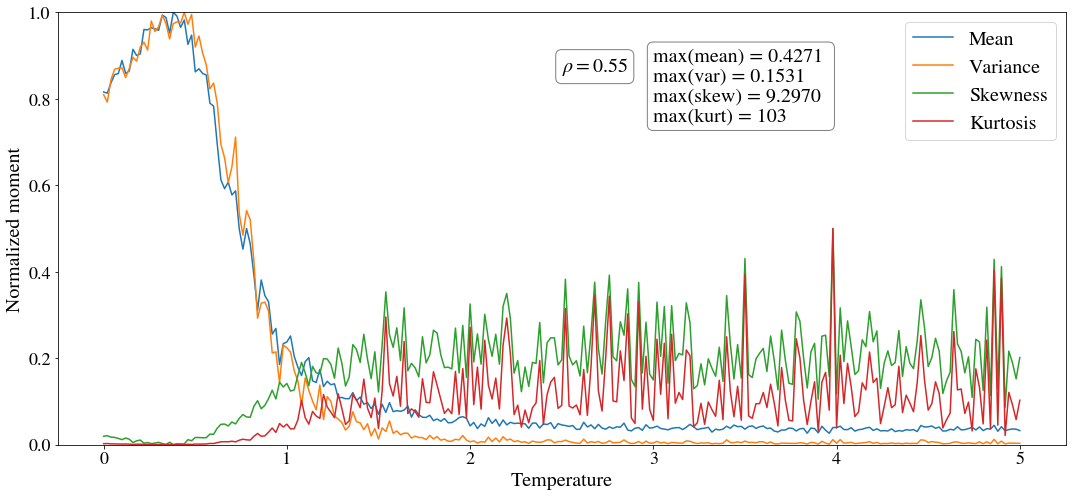

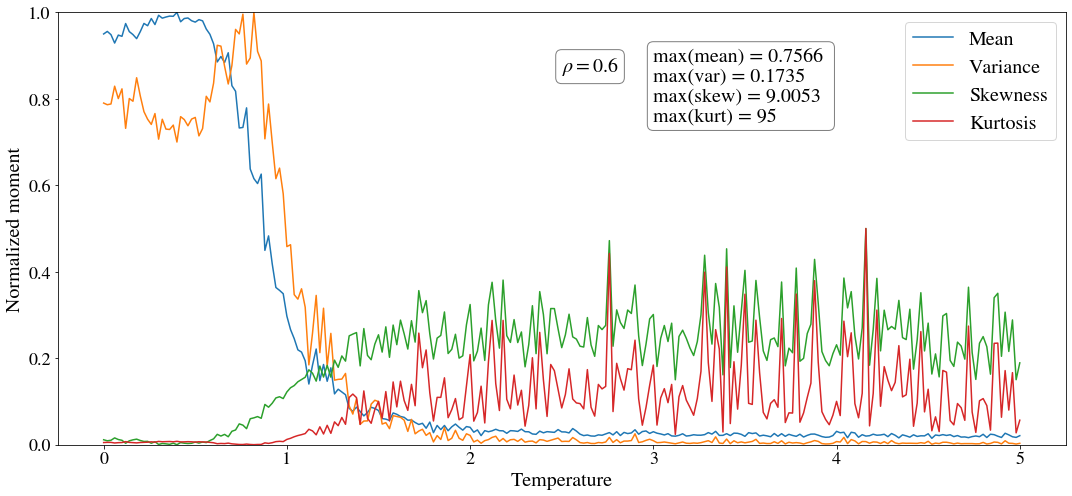

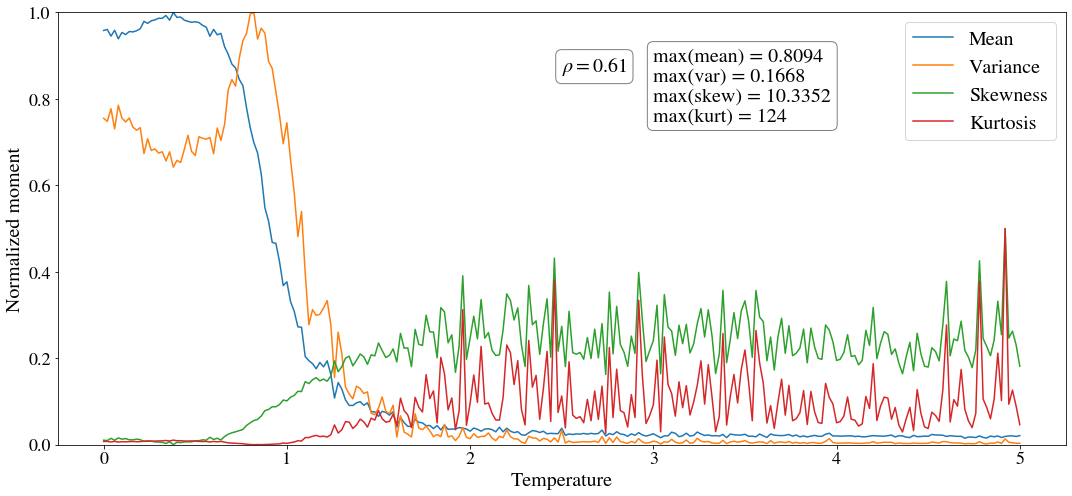

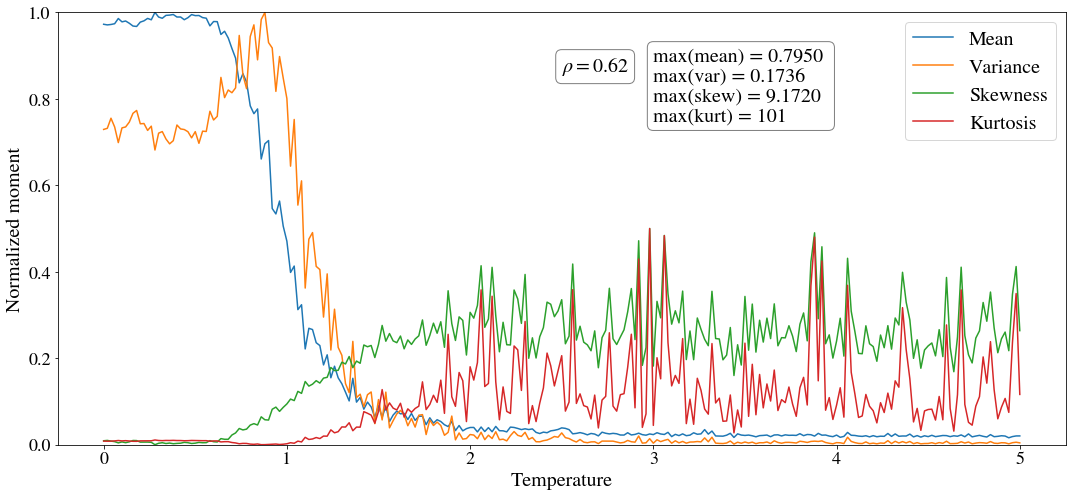

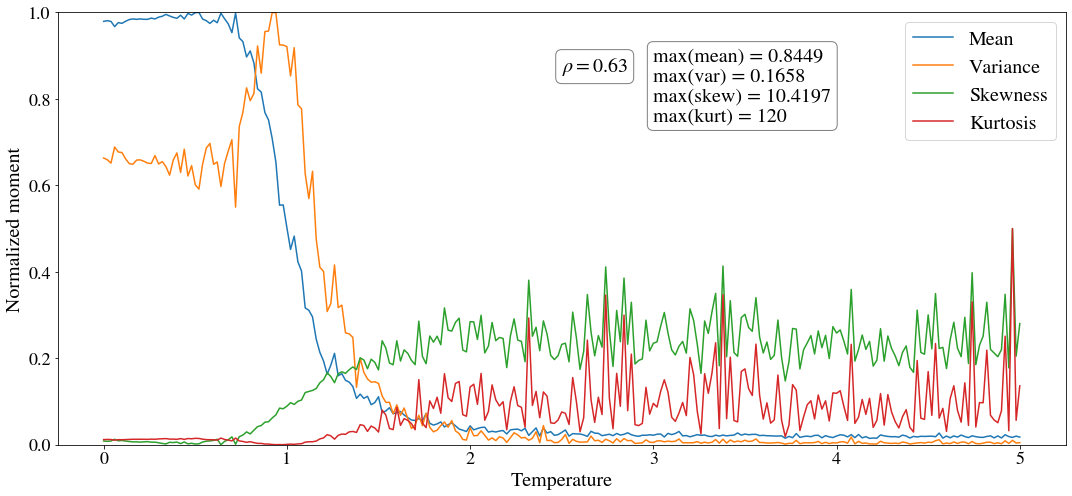

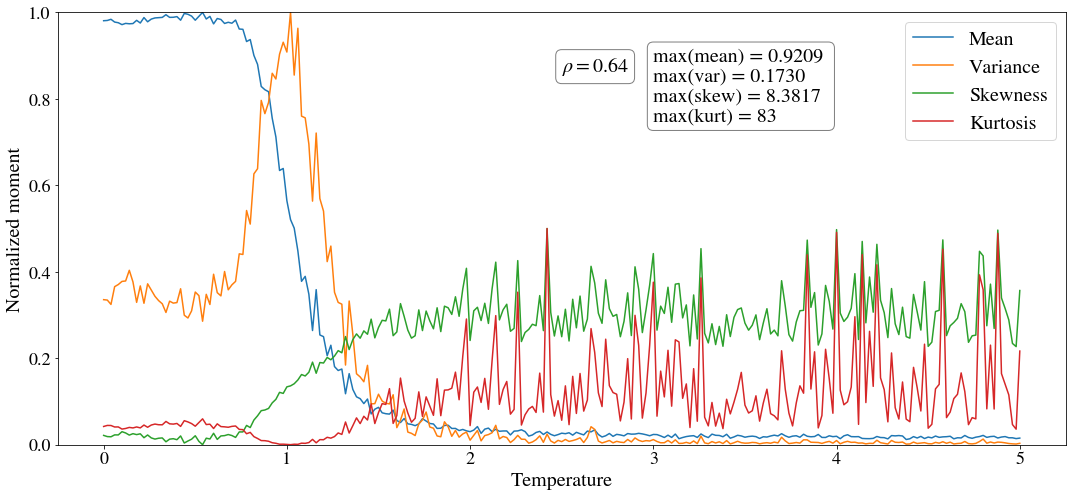

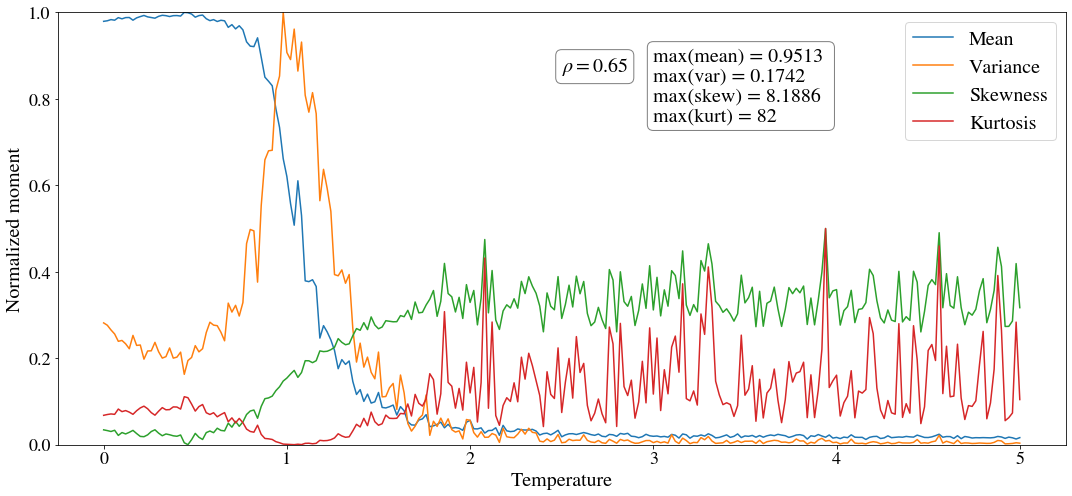

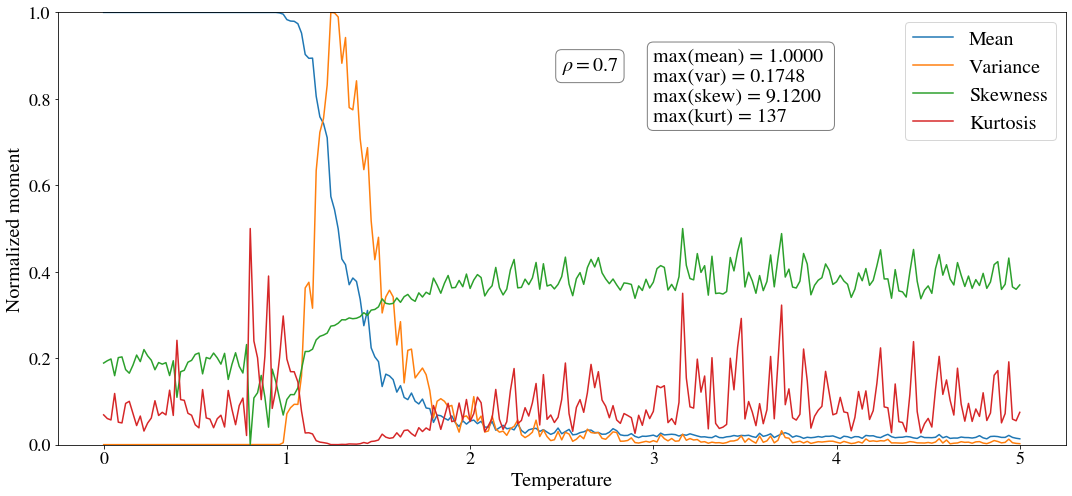

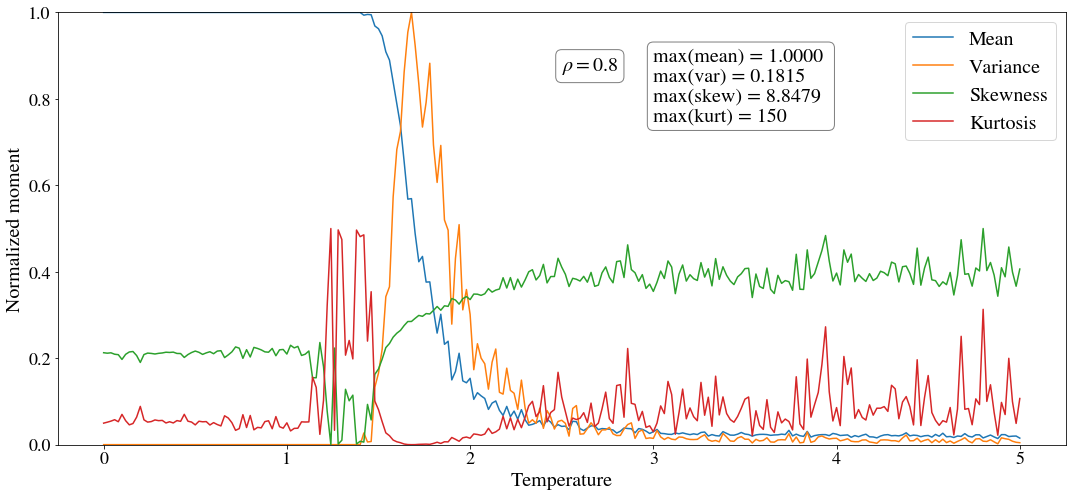

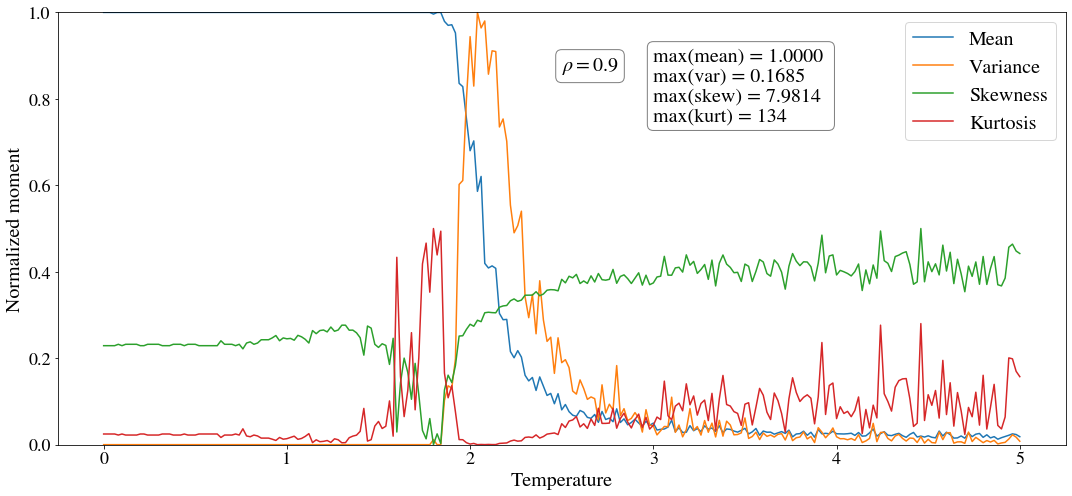

C:\Users\Usuario\AppData\Local\Temp/ipykernel_11972/846374626.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  st_skew.append(skew(prediction[i,1:]))
C:\Users\Usuario\AppData\Local\Temp/ipykernel_11972/846374626.py:20: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  st_kurt.append(kurtosis(prediction[i,1:]))


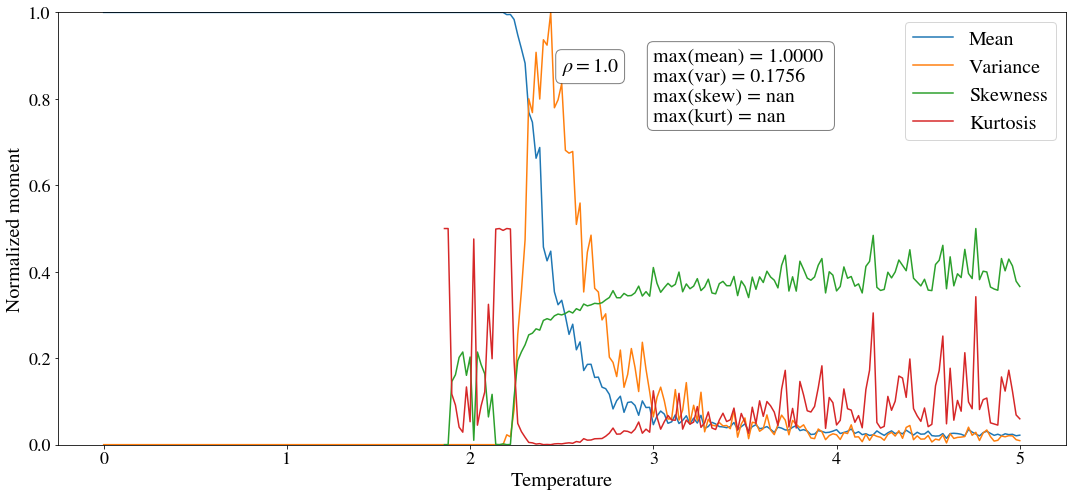

In [34]:
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import MinMaxScaler

pp = PdfPages(os.path.join(saving_folder, 'all_moments_model-08-18-24.pdf'))
for density_index, density in enumerate(densities):
	prediction = pd.read_csv(resultsfolder+f'/predictions_{densities_str[density_index]}.csv', header=0).to_numpy(float)

	plt.figure(figsize=(15, 7))

	st_mean = []
	st_var = []
	st_skew = []
	st_kurt = []

	for i in range(len(prediction[:,1])):

		st_mean.append(np.mean(prediction[i,1:]))
		st_var.append(np.var(prediction[i,1:]))
		st_skew.append(skew(prediction[i,1:]))
		st_kurt.append(kurtosis(prediction[i,1:]))

	st_mean_max = max(st_mean)
	st_var_max = max(st_var)
	st_skew_max = max(st_skew)
	st_kurt_max = max(st_kurt)

	# Mean

	st_mean = np.array(st_mean)/max(st_mean)
	
	# Variance

	st_var = np.array(st_var)/max(st_var)

	# Skewness and Kurtosis

	st_skew = np.array(st_skew).reshape(-1, 1)
	st_kurt = np.array(st_kurt).reshape(-1, 1)
	
	scaler = MinMaxScaler(feature_range=(0,0.5))
	st_skew = scaler.fit_transform(st_skew).flatten()
	st_kurt = scaler.fit_transform(st_kurt).flatten()
	#st_skew = np.array(st_skew)/max(st_skew)
	#st_kurt = np.array(st_kurt)/max(st_kurt)

	plt.plot(temperature, st_mean, label='Mean')
	plt.plot(temperature, st_var, label='Variance')
	plt.plot(temperature, st_skew, label='Skewness')
	plt.plot(temperature, st_kurt, label='Kurtosis')

	bbox_props = dict(boxstyle='round', facecolor='w', alpha=0.5)

	plt.text(2.5, 0.9, rf'$\rho = {density}$', color='black', 
		verticalalignment='top', horizontalalignment='left', fontsize=20,bbox=bbox_props)
	plt.text(3, 0.75, f'max(mean) = {st_mean_max:.4f} \nmax(var) = {st_var_max:.4f}\nmax(skew) = {st_skew_max:.4f}\nmax(kurt) = {st_kurt_max:.0f}', color='black',fontsize=20,bbox=bbox_props)

	plt.legend()

	plt.xlabel('Temperature')
	plt.ylabel('Normalized moment')
	plt.ylim((0, 1))
	pp.savefig()
	plt.show()

pp.close()

# Gauss

In [57]:
from scipy.optimize import curve_fit

def gaussian(x, a, x0, sigma):
	return a * np.exp(-(x - x0)**2 / (2 * sigma**2))

critical_temperatures = []
error = []

temperature = np.arange(0.0, 5.02, 0.02)


[0.2083053  0.13989321 0.44285829]
[[ 0.00031982 -0.00103541  0.00036341]
 [-0.00103541  0.00343483 -0.00123412]
 [ 0.00036341 -0.00123412  0.00045641]]
T_c = 0.13989320889196802


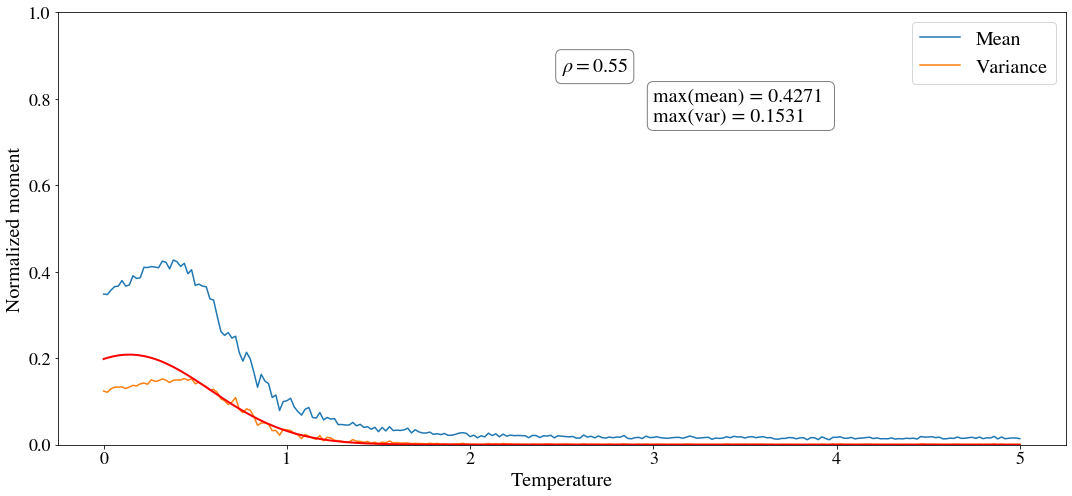

[0.16112886 0.70988806 0.28137781]
[[ 2.00878056e-06  9.18421674e-07 -3.34182593e-06]
 [ 9.18421674e-07  2.37715165e-05 -1.60666451e-05]
 [-3.34182593e-06 -1.60666451e-05  2.39994968e-05]]
T_c = 0.7098880631555052


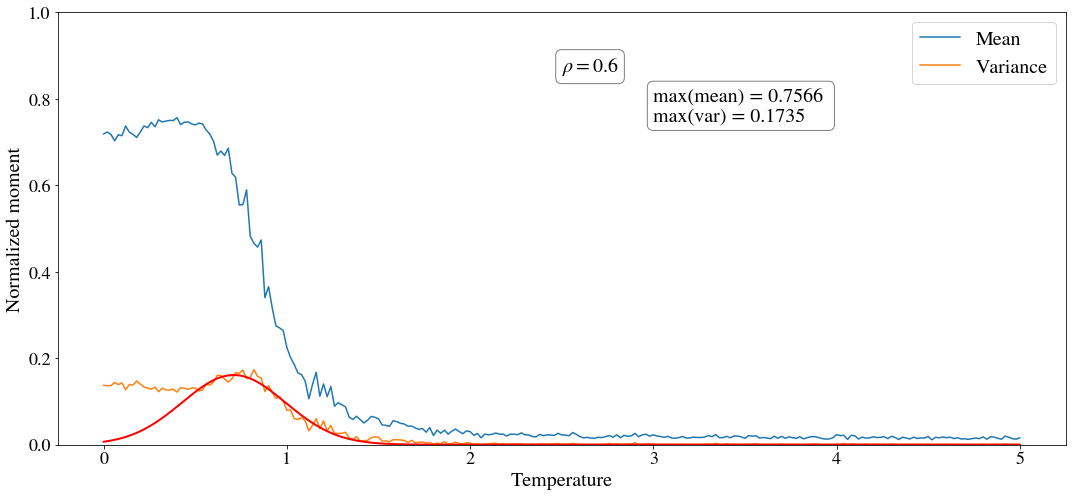

[0.15433924 0.77929459 0.28277083]
[[ 2.02688886e-06  9.58554918e-07 -3.52321037e-06]
 [ 9.58554918e-07  1.59303671e-05 -8.85690882e-06]
 [-3.52321037e-06 -8.85690882e-06  1.89520523e-05]]
T_c = 0.7792945917733397


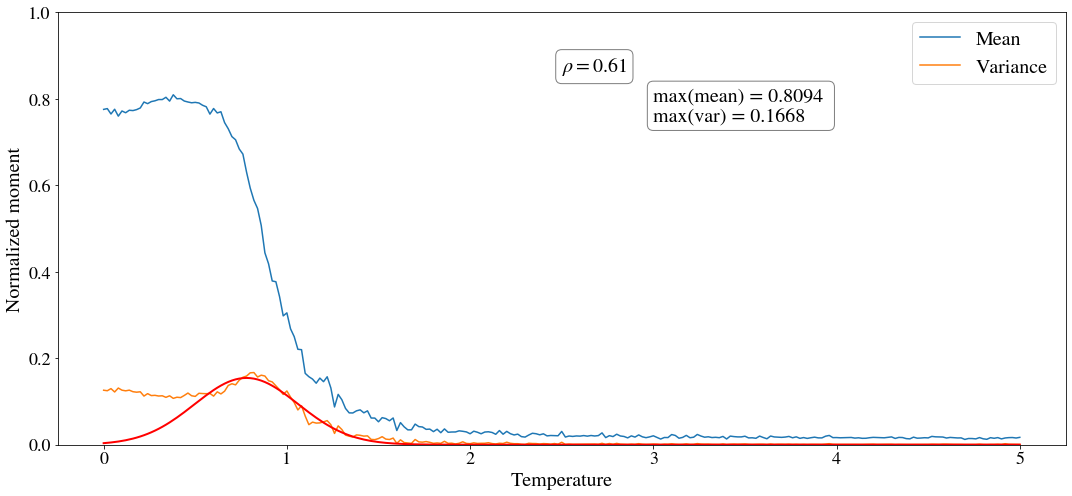

[0.16229267 0.78444153 0.30673595]
[[ 2.16820076e-06  1.12188501e-06 -3.94435489e-06]
 [ 1.12188501e-06  2.03079413e-05 -1.20899918e-05]
 [-3.94435489e-06 -1.20899918e-05  2.34126739e-05]]
T_c = 0.7844415275966375


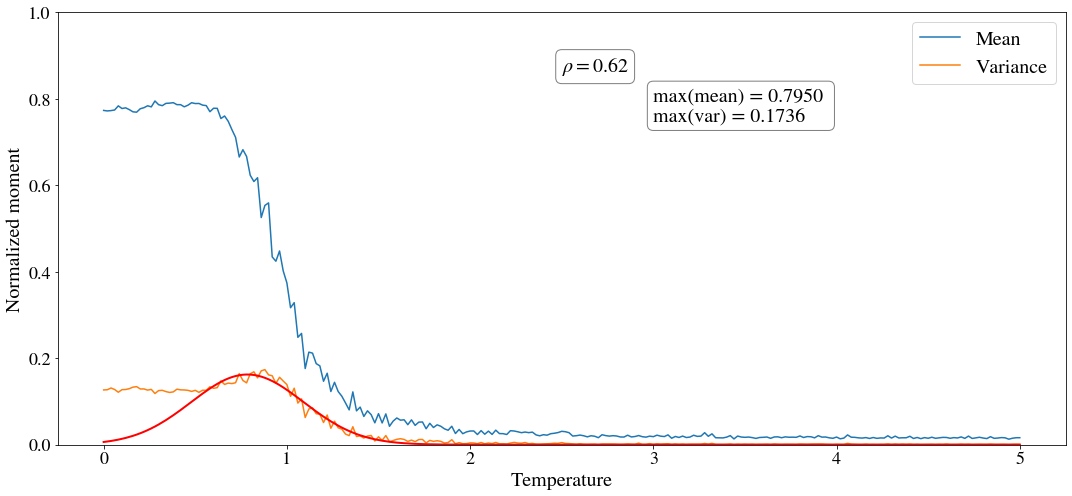

[0.14889242 0.85982431 0.31005052]
[[ 3.14947421e-06  1.32175579e-06 -5.88230272e-06]
 [ 1.32175579e-06  2.52175039e-05 -1.09592298e-05]
 [-5.88230272e-06 -1.09592298e-05  3.13960020e-05]]
T_c = 0.8598243102631441


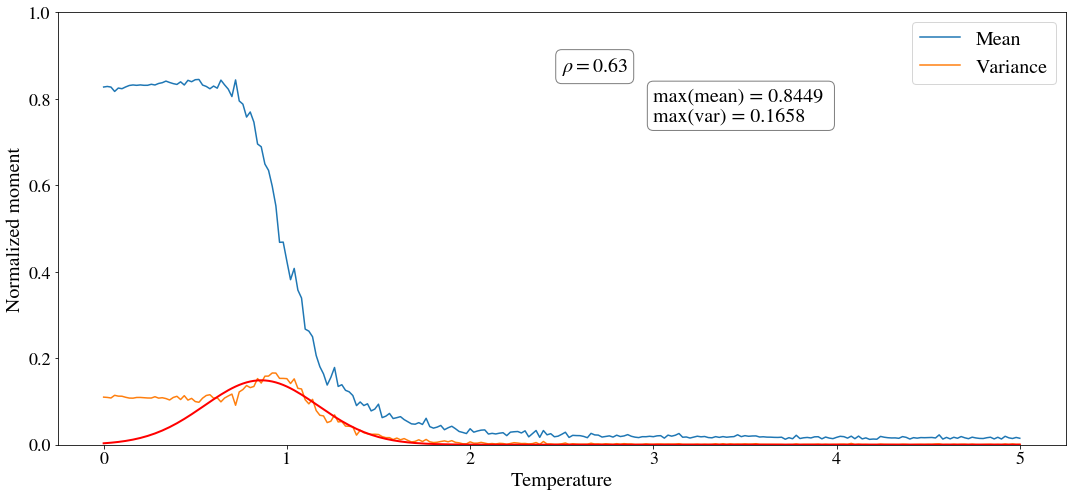

[0.14592138 0.97364053 0.24727772]
[[ 4.08846795e-06  2.13396000e-07 -4.93855414e-06]
 [ 2.13396000e-07  1.57474505e-05 -9.39401828e-07]
 [-4.93855414e-06 -9.39401828e-07  1.71617600e-05]]
T_c = 0.9736405307729166


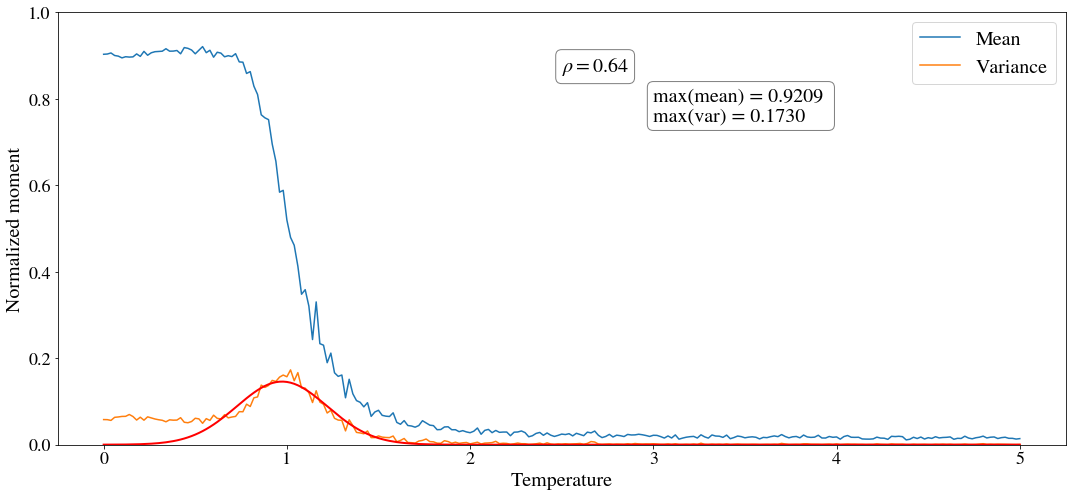

[0.14560401 1.02882124 0.23954743]
[[ 4.54084718e-06  8.48963188e-08 -5.12162777e-06]
 [ 8.48963188e-08  1.63606698e-05 -3.40396473e-07]
 [-5.12162777e-06 -3.40396473e-07  1.69894607e-05]]
T_c = 1.028821240605011


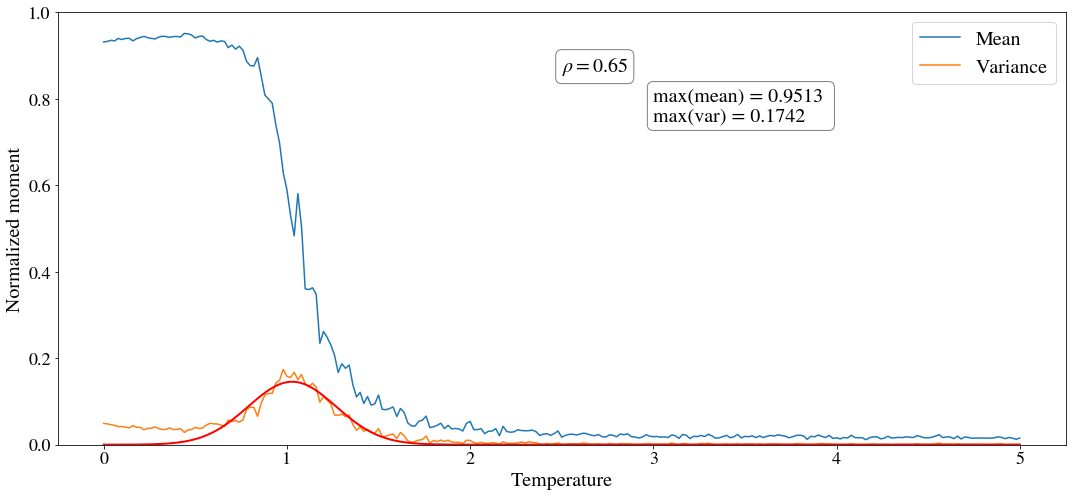

[0.16038716 1.31687369 0.15583498]
[[ 8.44387304e-06  6.88780462e-13 -5.46926898e-06]
 [ 6.88780462e-13  1.06276720e-05 -6.78331659e-13]
 [-5.46926898e-06 -6.78331659e-13  1.06276718e-05]]
T_c = 1.3168736870761368


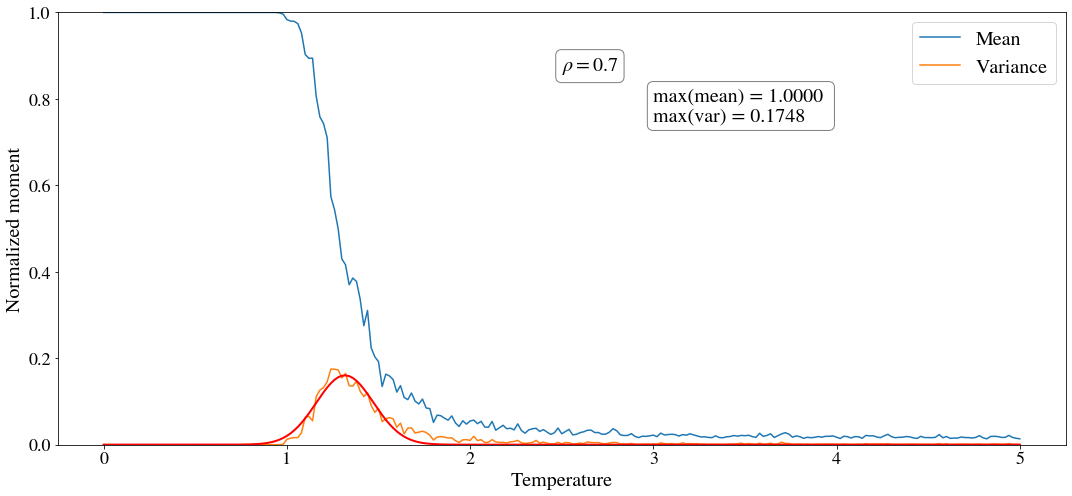

[0.1583521  1.73555196 0.15255128]
[[ 1.12100307e-05  1.23969027e-12 -7.19928426e-06]
 [ 1.23969027e-12  1.38705314e-05 -1.21280522e-12]
 [-7.19928426e-06 -1.21280522e-12  1.38705315e-05]]
T_c = 1.7355519644541355


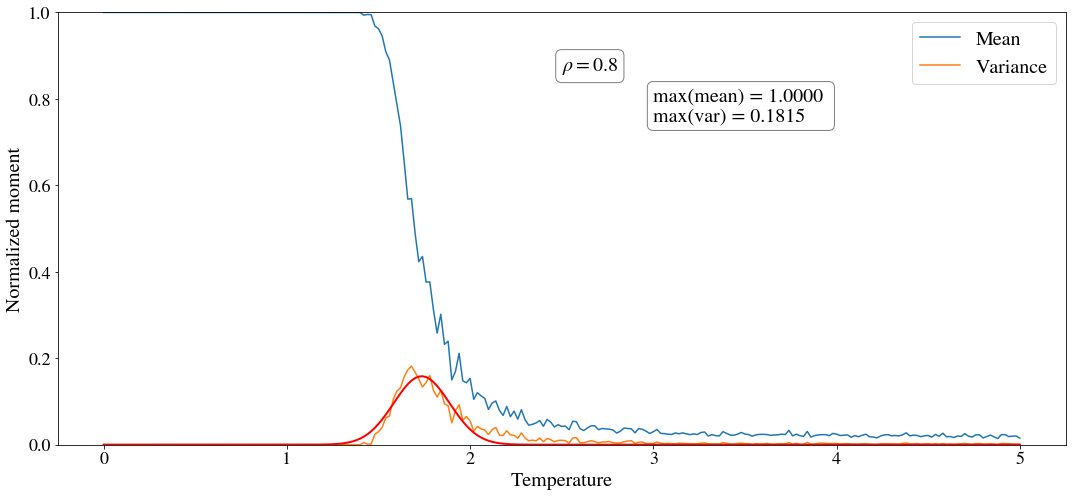

[0.15703355 2.10891716 0.1464201 ]
[[ 1.44033954e-05  1.93987489e-12 -8.95304446e-06]
 [ 1.93987489e-12  1.66954398e-05 -1.81184963e-12]
 [-8.95304446e-06 -1.81184963e-12  1.66954397e-05]]
T_c = 2.108917156255056


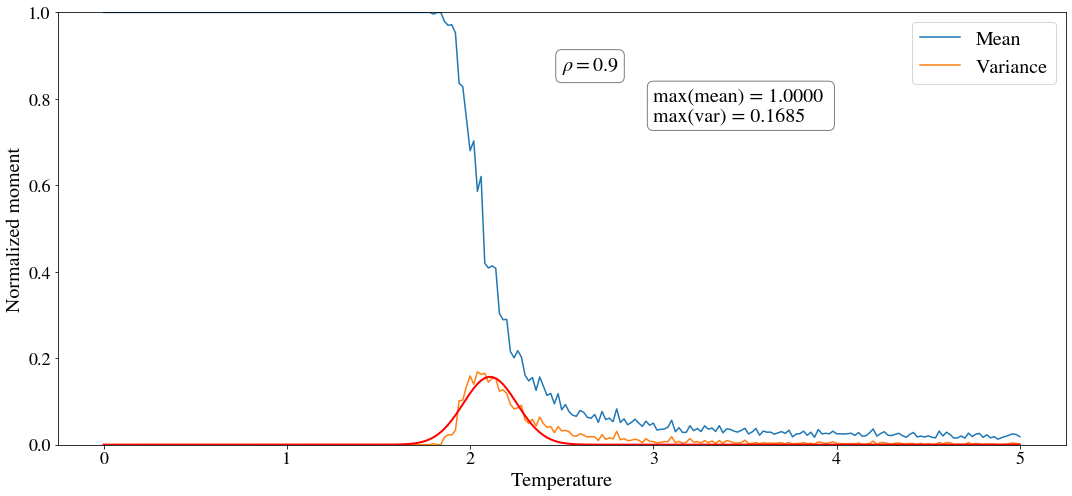

[0.15536663 2.4645996  0.14956007]
[[ 1.51578010e-05  2.37540236e-12 -9.72726083e-06]
 [ 2.37540236e-12  1.87269127e-05 -2.27352426e-12]
 [-9.72726083e-06 -2.27352426e-12  1.87269127e-05]]
T_c = 2.464599598662417


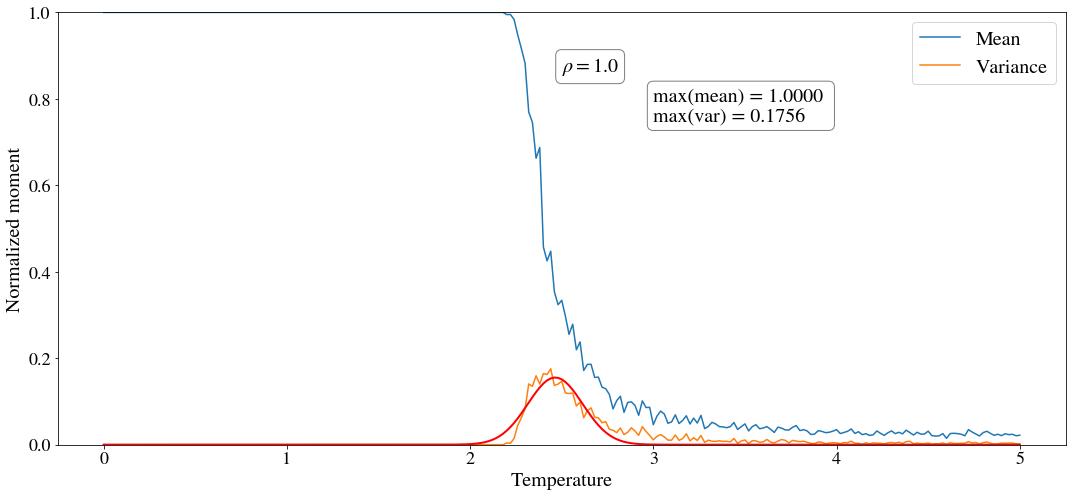

In [58]:
pp = PdfPages(os.path.join(saving_folder, 'fitting_model-08-18-24.pdf'))
for density_index, density in enumerate(densities):
	prediction = pd.read_csv(resultsfolder+f'/predictions_{densities_str[density_index]}.csv', header=0).to_numpy(float)

	plt.figure(figsize=(15, 7))

	st_mean = []
	st_var = []

	for i in range(len(prediction[:,1])):

		st_mean.append(np.mean(prediction[i,1:]))
		st_var.append(np.var(prediction[i,1:]))

	st_mean_max = max(st_mean)
	st_var_max = max(st_var)

	plt.plot(temperature, st_mean, label='Mean')
	plt.plot(temperature, st_var, label='Variance')

	initial_guesses = [max(st_var), temperature[np.argmax(st_var)], 0.1]

	popt, pcov = curve_fit(gaussian, temperature[25:], st_var[25:], p0=initial_guesses)

	print(popt)
	print(pcov)

	tc_init = popt[1]
	critical_temperatures.append(tc_init)
	error.append(popt[2])
	print(f'T_c = {tc_init}')
	plt.plot(temperature, gaussian(temperature, *popt), 'r-', linewidth=2)

	bbox_props = dict(boxstyle='round', facecolor='w', alpha=0.5)

	plt.text(2.5, 0.9, rf'$\rho = {density}$', color='black', 
		verticalalignment='top', horizontalalignment='left', fontsize=20,bbox=bbox_props)
	plt.text(3, 0.75, f'max(mean) = {st_mean_max:.4f} \nmax(var) = {st_var_max:.4f}', color='black',fontsize=20,bbox=bbox_props)

	plt.legend()

	plt.xlabel('Temperature')
	plt.ylabel('Normalized moment')
	plt.ylim((0, 1))
	pp.savefig()
	plt.show()

pp.close()

# $T_c$

In [59]:
temp = pd.DataFrame((np.concatenate((np.array(densities).reshape(len(densities),1), 
                                    np.array(critical_temperatures).reshape(len(densities),1),
									np.array(error).reshape(len(densities),1)),axis=1)), 
                                    columns=['Density','Temperature', 'Errors'])
temp.to_csv(os.path.join(saving_folder, 'temperatures_and_errors.csv'), index=False)

In [65]:
def model_function(x, A, B, K):
	return - K/np.log(x-B) + A

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Usuario\AppData\Local\Temp/ipykernel_11972/3774972441.py:2: RuntimeWarning: invalid value encountered in log
  return - K/np.log(x-B) + A


[0.1373027  0.59755641 0.82630906]
[[ 9.95282507e-04  1.27394158e-04 -1.08730515e-03]
 [ 1.27394158e-04  3.01518640e-05 -8.79312175e-05]
 [-1.08730515e-03 -8.79312175e-05  1.81083171e-03]]


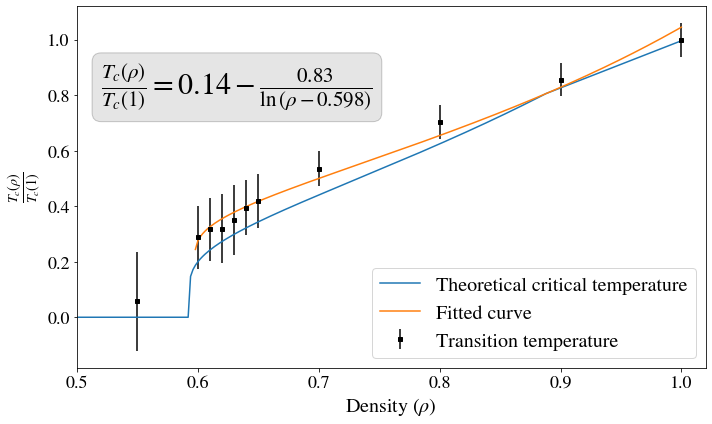

In [83]:
temp = pd.read_csv(os.path.join(saving_folder, 'temperatures_and_errors.csv'))

tc_rho1 = temp['Temperature'].to_numpy(float)[-1]

# Theoretical curve

sim_density = np.arange(0.0,1.002,0.002)
theoretical_curve = sim_density*0
for i in range(len(sim_density)):
    if sim_density[i]<0.592746:
        theoretical_curve[i] = 0
    elif sim_density[i]<0.89:
        theoretical_curve[i] = -(0.983)/(np.log(sim_density[i]-0.592746))  
        last_i = i

for i in range(last_i, len(sim_density)):
     theoretical_curve[i] = theoretical_curve[last_i] + 1.7 * (sim_density[i]-sim_density[last_i])

# Fitting

initial_guesses = [0.0, 0.592746, 1.0]

popt, pcov = curve_fit(model_function, temp['Density'][1:], temp['Temperature'][1:]/tc_rho1, p0=initial_guesses)
print(popt)
print(pcov)

# Plotting

bbox_props = dict(boxstyle='round', facecolor='grey', alpha=0.2)

plt.figure(figsize=(10, 6))
plt.plot(sim_density, theoretical_curve, label = 'Theoretical critical temperature')
plt.errorbar(temp['Density'],temp['Temperature']/tc_rho1,
			color='black',
			yerr=temp['Errors']/tc_rho1,
			fmt='s',
			markersize=4,
			label='Transition temperature')
plt.plot(sim_density, model_function(sim_density, *popt), label = 'Fitted curve')
plt.text(0.52, 0.92, rf'$\frac{{T_c(\rho)}}{{T_c(1)}} = {popt[0]:.2f} - \frac{{{popt[2]:.2f}}}{{\ln{{(\rho - {popt[1]:.3f})}}}}$', color='black', verticalalignment='top', horizontalalignment='left', fontsize=30,bbox=bbox_props)
plt.xlabel(r'Density ($\rho$)')
plt.ylabel(r'$\frac{T_c(\rho)}{T_c(1)}$')

plt.xlim(0.5,1.02)

plt.legend(loc='lower right')
plt.savefig(os.path.join(saving_folder, 'critical_temperatures_vs_density.pdf'))
plt.show()